     Timestamp Longitude Latitude
0   1658075022    6.4559   2.9198
1   1658075033    6.8352   3.4529
2   1658075043    7.2150   3.9857
3   1658075053    7.5773   4.4931
4   1658075064    7.9584   5.0256
..         ...       ...      ...
95  1658076009   56.4106  46.4589
96  1658076019   57.2622  46.7506
97  1658076029   58.0823  47.0218
98  1658076040   58.9528  47.2996
99  1658076050   59.8328  47.5700

[100 rows x 3 columns]



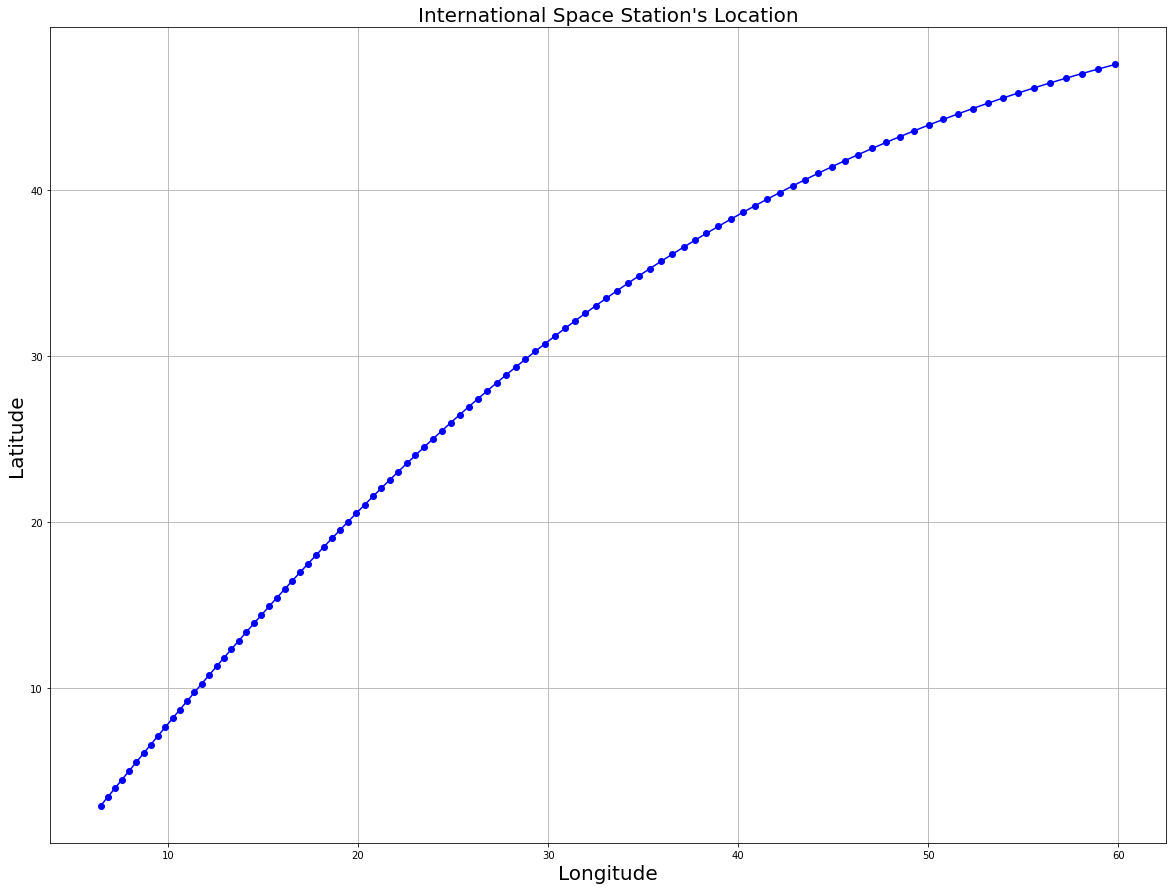

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

url="http://api.open-notify.org/iss-now.json"

list_of_data=[]
number_of_data = 0
time_schedule = time.time()


while number_of_data < 100 : #plot 100 points in the world map graph
    if (time.time() - time_schedule) >= 10 : #activate API once every at least 10 seconds
        
        response = requests.get(url)
        response.raise_for_status()
        response = response.json()
        df = pd.DataFrame.from_dict(response)

        Latitude = df.loc['latitude','iss_position']
        Longitude = df.loc['longitude','iss_position']
        Timestamp = df.loc['longitude','timestamp']

        data = [Timestamp,Longitude,Latitude]
        list_of_data.append(data)

        time_schedule = time.time()
        number_of_data = number_of_data + 1 

ISSloc_df = pd.DataFrame(list_of_data,columns=['Timestamp','Longitude','Latitude'] )
ISSloc_df.reset_index(drop=True, inplace=True)
print(ISSloc_df)
print('')

longitude_strlist = ISSloc_df['Longitude'].tolist()
longitude_floatlist = list(np.float_(longitude_strlist))

latitude_strlist = ISSloc_df['Latitude'].tolist()
latitude_floatlist = list(np.float_(latitude_strlist))

x = longitude_floatlist
y = latitude_floatlist

plt.plot(x,y,color='blue',marker='o')
plt.title("International Space Station's Location", fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.rcParams["figure.figsize"] = (20,12)
plt.grid(True)
plt.show()